#**Test Technique :**
Candidature Alternance Data Engineer - Mise en œuvre de produits d'information et d'aide à la décision

#Sujet:
We want to  forecast power production in France. There are several websites where we can get the public dataset e.g. RTE, ENSOE,… This test requires candidates to crawl data and create a simple machine learning, deep learning model.
1. Crawl production and consumption energy data from RTE website: from 01/2012 to 05/2024  éCO2mix - La production d'électricité par filière | RTE (rte-france.com)  
2. Analyze the data (plot the curve; identify the share of each type of production technology in terms of capacity; which month has the highest level of aggregated production (distinguish by technology) and consumption).
3. Predict the total energy production for 06/2024  





# 1. Collecte des données

In [ ]:
import requests
from requests.auth import HTTPBasicAuth

# Informations d'authentification
client_id = "e33e8cc8-dba1-4dc7-94f7-0a2d4ebcdad1"
client_secret = "35fd6d62-d9aa-48c3-924e-999a45cbe2eb"
token_url = "https://digital.iservices.rte-france.com/token/oauth/"

# En-tête HTTP avec les informations d'authentification
headers = {
    "Content-Type": "application/x-www-form-urlencoded",
    "Accept": "application/json"
}

# Corps de la requête pour obtenir le token d'accès
data = {
    "grant_type": "client_credentials",
    "scope": "actual_generation"
}

# Authentification avec les clés API (client_id et client_secret)
auth = HTTPBasicAuth(client_id, client_secret)

# Requête POST pour obtenir le token d'accès
response = requests.post(token_url, headers=headers, auth=auth, data=data)

# Vérification de la réponse
if response.status_code == 200:
    token_data = response.json()
    access_token = token_data.get("access_token")
    print(f"Access token: {access_token}")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)


Access token: Hst68IScDk7UlXSbBf9wu36mgppzih7jIEpkvgnTBsUTG6SVMEImbu


## a. les données de production :

In [ ]:
import requests
import time

# URL de base de l'API RTE pour récupérer les données de production par filière
base_url = "https://digital.iservices.rte-france.com/open_api/actual_generation/v1/actual_generations_per_production_type"

# Token d'accès OAuth
access_token = access_token

# Headers avec le token d'accès
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Liste pour stocker les données récupérées
all_data = []

# Itération sur chaque année et mois de janvier 2012 à mai 2024
for year in range(2012, 2025):
    for month in range(1, 13):
        # Stopper la boucle si on dépasse mai 2024
        if year == 2024 and month > 5:
            break

        # Définir la date de début et de fin pour le mois en cours
        start_date = f"{year}-{month:02d}-01T00:00:00+02:00"
        if month == 12:
            end_date = f"{year+1}-01-01T00:00:00+02:00"
        else:
            end_date = f"{year}-{month+1:02d}-01T00:00:00+02:00"

        # Préparer les paramètres de la requête
        params = {
            "start_date": start_date,
            "end_date": end_date
        }

        # Faire la requête GET à l'API RTE
        response = requests.get(base_url, headers=headers, params=params)

        # Vérifier si la requête a réussi (code 200) et traiter la réponse
        if response.status_code == 200:
            data = response.json()["actual_generations_per_production_type"]
            all_data.extend(data)  # Ajouter les données à la liste principale
            print(f"Data for {start_date} to {end_date} fetched successfully.")
        else:
            print(f"Failed to fetch data for {start_date} to {end_date}. Status code: {response.status_code}")
            print(response.text)

        # Pause pour éviter de surcharger le serveur RTE
        time.sleep(1)  # Pause d'1 seconde entre chaque requête

# Une fois toutes les données récupérées,  traiter comme nécessaire
print(f"Total data points fetched: {len(all_data)}")


Data for 2012-01-01T00:00:00+02:00 to 2012-02-01T00:00:00+02:00 fetched successfully.
Data for 2012-02-01T00:00:00+02:00 to 2012-03-01T00:00:00+02:00 fetched successfully.
Data for 2012-03-01T00:00:00+02:00 to 2012-04-01T00:00:00+02:00 fetched successfully.
Data for 2012-04-01T00:00:00+02:00 to 2012-05-01T00:00:00+02:00 fetched successfully.
Data for 2012-05-01T00:00:00+02:00 to 2012-06-01T00:00:00+02:00 fetched successfully.
Data for 2012-06-01T00:00:00+02:00 to 2012-07-01T00:00:00+02:00 fetched successfully.
Data for 2012-07-01T00:00:00+02:00 to 2012-08-01T00:00:00+02:00 fetched successfully.
Data for 2012-08-01T00:00:00+02:00 to 2012-09-01T00:00:00+02:00 fetched successfully.
Data for 2012-09-01T00:00:00+02:00 to 2012-10-01T00:00:00+02:00 fetched successfully.
Data for 2012-10-01T00:00:00+02:00 to 2012-11-01T00:00:00+02:00 fetched successfully.
Data for 2012-11-01T00:00:00+02:00 to 2012-12-01T00:00:00+02:00 fetched successfully.
Data for 2012-12-01T00:00:00+02:00 to 2013-01-01T00:00

In [ ]:
import pandas as pd

# Convertir les données récupérées en un DataFrame pandas
df = pd.DataFrame(all_data)

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv('production_data_rte.csv', index=False)

print("Data saved to production_data_rte.csv")


Data saved to production_data_rte.csv


In [ ]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('production_data_rte.csv')

# Afficher les premières lignes du DataFrame pour vérification
print(df.head())


                  start_date                   end_date       production_type  \
0  2014-12-01T00:00:00+01:00  2014-12-31T00:00:00+01:00               BIOMASS   
1  2014-12-01T00:00:00+01:00  2014-12-31T00:00:00+01:00            FOSSIL_GAS   
2  2014-12-01T00:00:00+01:00  2014-12-31T00:00:00+01:00      FOSSIL_HARD_COAL   
3  2014-12-01T00:00:00+01:00  2014-12-31T00:00:00+01:00            FOSSIL_OIL   
4  2014-12-01T00:00:00+01:00  2014-12-31T00:00:00+01:00  HYDRO_PUMPED_STORAGE   

                                              values  
0  [{'start_date': '2014-12-15T00:00:00+01:00', '...  
1  [{'start_date': '2014-12-15T00:00:00+01:00', '...  
2  [{'start_date': '2014-12-15T00:00:00+01:00', '...  
3  [{'start_date': '2014-12-15T00:00:00+01:00', '...  
4  [{'start_date': '2014-12-15T00:00:00+01:00', '...  


In [ ]:
#import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('production_data_rte.csv')

# Afficher les noms de toutes les colonnes
print(df.columns)


Index(['start_date', 'end_date', 'production_type', 'values'], dtype='object')


In [ ]:
# Afficher les valeurs uniques de la colonne 'production_type'
unique_production_types = df['production_type'].unique()
print(unique_production_types)

['BIOMASS' 'FOSSIL_GAS' 'FOSSIL_HARD_COAL' 'FOSSIL_OIL'
 'HYDRO_PUMPED_STORAGE' 'HYDRO_RUN_OF_RIVER_AND_POUNDAGE'
 'HYDRO_WATER_RESERVOIR' 'NUCLEAR' 'SOLAR' 'WASTE' 'WIND_ONSHORE' 'TOTAL'
 'WIND_OFFSHORE']


## b. les données de consomation :

In [ ]:
import requests
import time

# URL de base de l'API RTE pour récupérer les données de consommation
base_url_consumption = "https://digital.iservices.rte-france.com/open_api/consumption/v1/short_term"

# Token d'accès OAuth
access_token = access_token

# Headers avec le token d'accès
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Liste pour stocker les données récupérées de consommation
all_consumption_data = []

# Itération sur chaque année et mois de janvier 2012 à mai 2024
for year in range(2012, 2025):
    for month in range(1, 13):
        # Stopper la boucle si on dépasse mai 2024
        if year == 2024 and month > 5:
            break

        # Définir la date de début et de fin pour le mois en cours
        start_date = f"{year}-{month:02d}-01T00:00:00+02:00"
        if month == 12:
            end_date = f"{year+1}-01-01T00:00:00+02:00"
        else:
            end_date = f"{year}-{month+1:02d}-01T00:00:00+02:00"

        # Préparer les paramètres de la requête
        params = {
            "type": "REALISED,ID,D-1,D-2",
            "start_date": start_date,
            "end_date": end_date
        }

        # Faire la requête GET à l'API RTE pour la consommation
        response = requests.get(base_url_consumption, headers=headers, params=params)

        # Vérifier si la requête a réussi (code 200) et traiter la réponse
        if response.status_code == 200:
            data = response.json()["short_term"]
            for entry in data:
                for value in entry["values"]:
                    all_consumption_data.append({
                        "type": entry["type"],
                        "start_date": value['start_date'],
                        "end_date": value['end_date'],
                        "value": value['value']
                    })
            print(f"Data for {start_date} to {end_date} fetched successfully.")
        else:
            print(f"Failed to fetch data for {start_date} to {end_date}. Status code: {response.status_code}")
            print(response.text)

        # Pause pour éviter de surcharger le serveur RTE
        time.sleep(1)  # Pause d'1 seconde entre chaque requête

# Une fois toutes les données récupérées, traiter comme nécessaire
print(f"Total data points fetched: {len(all_consumption_data)}")

# Afficher les colonnes du dataframe créé
df_consumption = pd.DataFrame(all_consumption_data)
print(df_consumption.columns)
print(df_consumption.head())


Data for 2012-01-01T00:00:00+02:00 to 2012-02-01T00:00:00+02:00 fetched successfully.
Data for 2012-02-01T00:00:00+02:00 to 2012-03-01T00:00:00+02:00 fetched successfully.
Data for 2012-03-01T00:00:00+02:00 to 2012-04-01T00:00:00+02:00 fetched successfully.
Data for 2012-04-01T00:00:00+02:00 to 2012-05-01T00:00:00+02:00 fetched successfully.
Data for 2012-05-01T00:00:00+02:00 to 2012-06-01T00:00:00+02:00 fetched successfully.
Data for 2012-06-01T00:00:00+02:00 to 2012-07-01T00:00:00+02:00 fetched successfully.
Data for 2012-07-01T00:00:00+02:00 to 2012-08-01T00:00:00+02:00 fetched successfully.
Data for 2012-08-01T00:00:00+02:00 to 2012-09-01T00:00:00+02:00 fetched successfully.
Data for 2012-09-01T00:00:00+02:00 to 2012-10-01T00:00:00+02:00 fetched successfully.
Data for 2012-10-01T00:00:00+02:00 to 2012-11-01T00:00:00+02:00 fetched successfully.
Data for 2012-11-01T00:00:00+02:00 to 2012-12-01T00:00:00+02:00 fetched successfully.
Data for 2012-12-01T00:00:00+02:00 to 2013-01-01T00:00

In [ ]:
# Afficher les noms des colonnes du DataFrame
print(df_consumption.columns)

Index(['type', 'start_date', 'end_date', 'value'], dtype='object')


# 2. Analyse des données

## a. Données de production :

Dans le jeu de données, j'ai observé des valeurs négatives pour la variable 'HYDRO_PUMPED_STORAGE'. En considérant le fonctionnement d'une station de transfert d'énergie par pompage (STEP), ces valeurs négatives indiquent vraisemblablement que la STEP consomme plus d'électricité qu'elle n'en produit à ces moments-là.

Par conséquent, pour l'analyse de la production et la représentation graphique, je remplacerai ces valeurs négatives par 0. En effet, bien que la STEP ait une consommation non nulle, l'objectif ici est d'analyser la production nette d'électricité, qui est nulle lorsque la consommation dépasse la production.


Production totale par type de production :
                    production_type  total_production
7                           NUCLEAR        3356452167
5   HYDRO_RUN_OF_RIVER_AND_POUNDAGE         369607591
1                        FOSSIL_GAS         309484067
12                     WIND_ONSHORE         294853984
6             HYDRO_WATER_RESERVOIR         137970892
8                             SOLAR         118441713
2                  FOSSIL_HARD_COAL          41985406
0                           BIOMASS          27835451
3                        FOSSIL_OIL          17826294
10                            WASTE          15463861
11                    WIND_OFFSHORE           2434863
4              HYDRO_PUMPED_STORAGE                 0


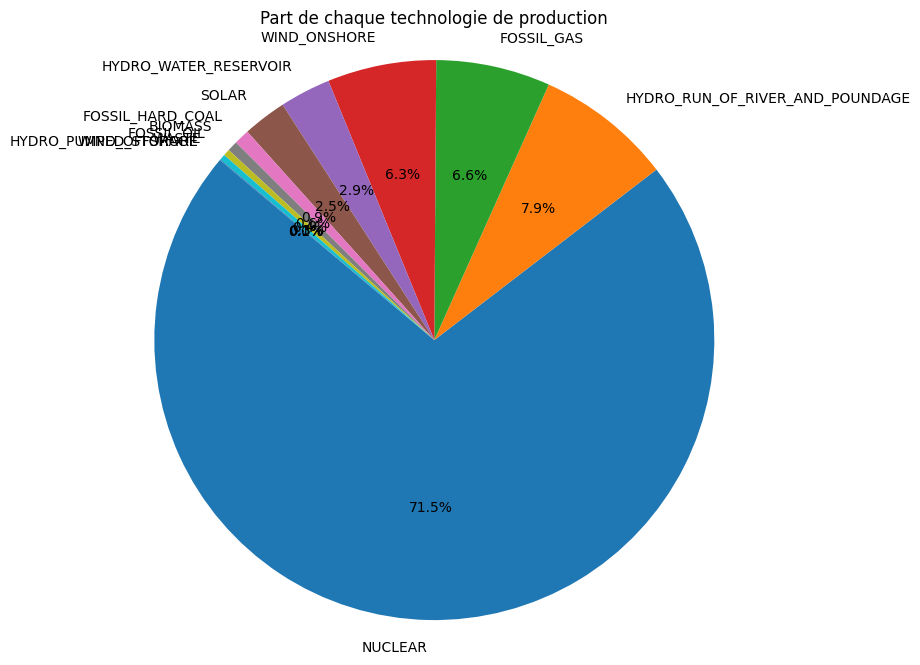

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le CSV
df = pd.read_csv('production_data_rte.csv')

# Filtrer les valeurs négatives et convertir 'values' en liste d'objets Python
df['values'] = df['values'].apply(eval)
df['total_production'] = df['values'].apply(lambda x: sum(entry['value'] for entry in x))

# Sélectionner uniquement les colonnes nécessaires
df = df[['start_date', 'end_date', 'production_type', 'total_production']]

# Filtrer la production totale pour chaque type de production
total_production_df = df.groupby('production_type')['total_production'].sum().reset_index()

# Remplacer les valeurs négatives par 0
total_production_df['total_production'] = total_production_df['total_production'].clip(lower=0)

# Exclure la ligne "TOTAL" du DataFrame car pas besoin dans le représentation
total_production_df = total_production_df[total_production_df['production_type'] != 'TOTAL']

# Trier par production totale décroissante pour la visualisation
total_production_df = total_production_df.sort_values(by='total_production', ascending=False)

# Afficher la production totale par type de production
print("\nProduction totale par type de production :")
print(total_production_df)

# Obtenir le total global pour le diagramme
total_global_production = df.loc[df['production_type'] == 'TOTAL', 'total_production'].sum()

# Créer un diagramme circulaire pour visualiser la part de chaque technologie de production par rapport au total global
plt.figure(figsize=(10, 8))
plt.pie(total_production_df['total_production'], labels=total_production_df['production_type'], autopct='%1.1f%%', startangle=140)
plt.title('Part de chaque technologie de production')
plt.axis('equal')  # Assure que le diagramme soit circulaire
plt.show()



In [ ]:
import pandas as pd

# Charger les données depuis le CSV
df = pd.read_csv('production_data_rte.csv')

# Supprimer le décalage horaire des dates
df['start_date'] = df['start_date'].str[:-6]

# Convertir 'start_date' en datetime
try:
    df['start_date'] = pd.to_datetime(df['start_date'])
except Exception as e:
    print(f"Error converting 'start_date' to datetime: {e}")

# Vérifier les types de données après conversion
print(df.dtypes)

# Si la conversion réussit, extraire le mois et l'année
if 'start_date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['start_date']):
    df['month'] = df['start_date'].dt.month
    df['year'] = df['start_date'].dt.year
else:
    print("Conversion de 'start_date' à datetime non réussie. Vérifiez le format des dates.")


start_date         datetime64[ns]
end_date                   object
production_type            object
values                     object
dtype: object


In [ ]:
# Extraire le mois et l'année de chaque enregistrement pour faciliter le groupement
df['month'] = df['start_date'].dt.month
df['year'] = df['start_date'].dt.year


In [ ]:
# Calculer la production totale par mois et par technologie
def calculate_total_production(group):
    total_production = 0
    for values_list in group:
        for entry in eval(values_list):
            total_production += entry['value']
    return total_production

monthly_production = df.groupby(['production_type', 'year', 'month'])['values'].apply(calculate_total_production).reset_index(name='total_production')


In [ ]:
# Regrouper par 'production_type', 'year' et 'month' pour obtenir la production agrégée par mois et par technologie
monthly_production = monthly_production.groupby(['production_type', 'year', 'month'])['total_production'].sum().reset_index()

In [ ]:
# Trouver le mois avec la production la plus élevée pour chaque technologie
max_production_by_technology = monthly_production.loc[monthly_production.groupby('production_type')['total_production'].idxmax()]

In [ ]:
# Affichage de la production totale par mois et par technologie
print("Production totale par mois et par technologie :")
print(monthly_production.head())  # Affiche les premières lignes du DataFrame monthly_production

# Affichage du mois avec la production la plus élevée pour chaque technologie
print("\nMois avec la production la plus élevée pour chaque technologie :")
print(max_production_by_technology.head())  # Affiche les premières lignes du DataFrame max_production_by_technology


Production totale par mois et par technologie :
  production_type  year  month  total_production
0         BIOMASS  2014     12             73005
1         BIOMASS  2015      1            145930
2         BIOMASS  2015      2            142811
3         BIOMASS  2015      3            155818
4         BIOMASS  2015      4            150579

Mois avec la production la plus élevée pour chaque technologie :
          production_type  year  month  total_production
89                BIOMASS  2022      5            429073
138            FOSSIL_GAS  2016     12           5645793
230      FOSSIL_HARD_COAL  2015      2           1665463
367            FOSSIL_OIL  2017      1            711160
457  HYDRO_PUMPED_STORAGE  2015      1            605339


In [ ]:
# Filtrer les données pour exclure le type de production "TOTAL" car on en a pas besoin
filtered_monthly_production = monthly_production[monthly_production['production_type'] != 'TOTAL']
filtered_max_production_by_technology = max_production_by_technology[max_production_by_technology['production_type'] != 'TOTAL']


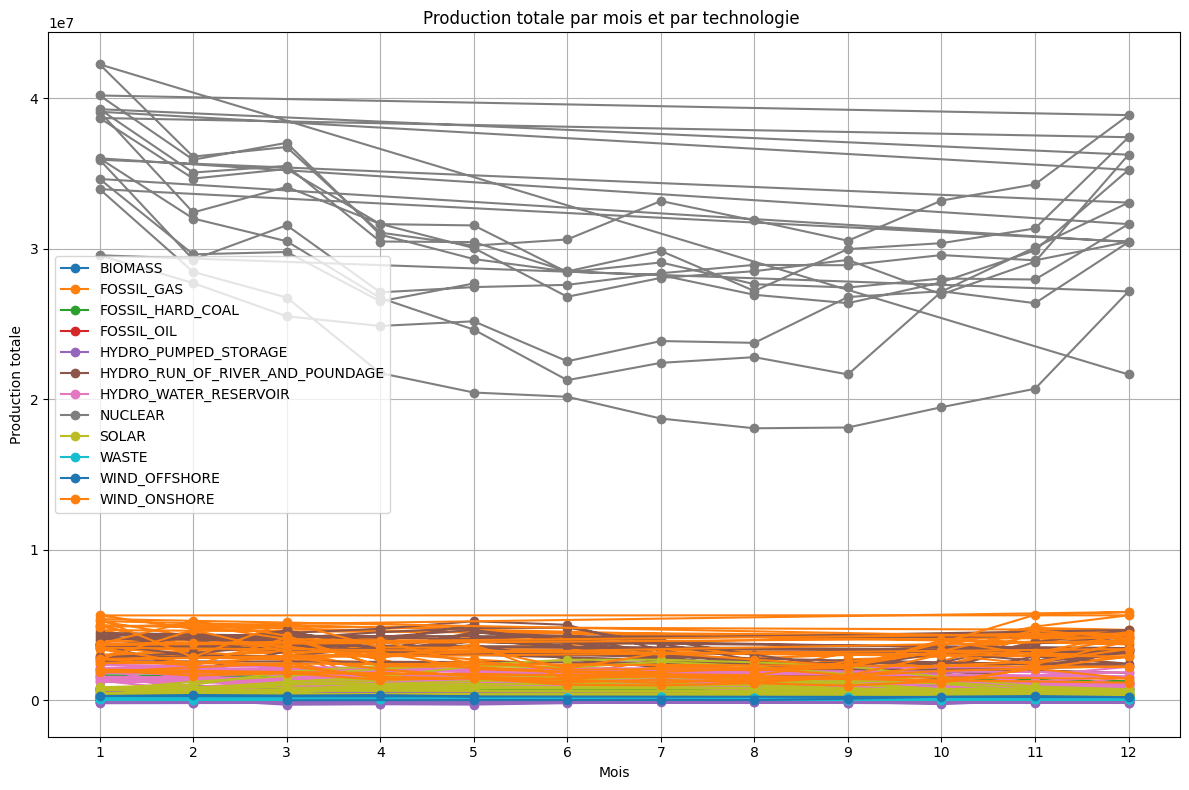

In [ ]:
import matplotlib.pyplot as plt

# Exemple de tracé de courbes pour la production totale par mois et par technologie
plt.figure(figsize=(12, 8))

# Boucle sur chaque technologie pour tracer une courbe distincte
for technology, group in filtered_monthly_production.groupby('production_type'):
    plt.plot(group['month'], group['total_production'], marker='o', label=technology)

plt.title('Production totale par mois et par technologie ')
plt.xlabel('Mois')
plt.ylabel('Production totale')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()



Ce graphe n'étant pas trés pertinent en raison des difficulter d'observation des types de production autre que le nucléaire j'ai décidé d'implémenter d'autre graphe

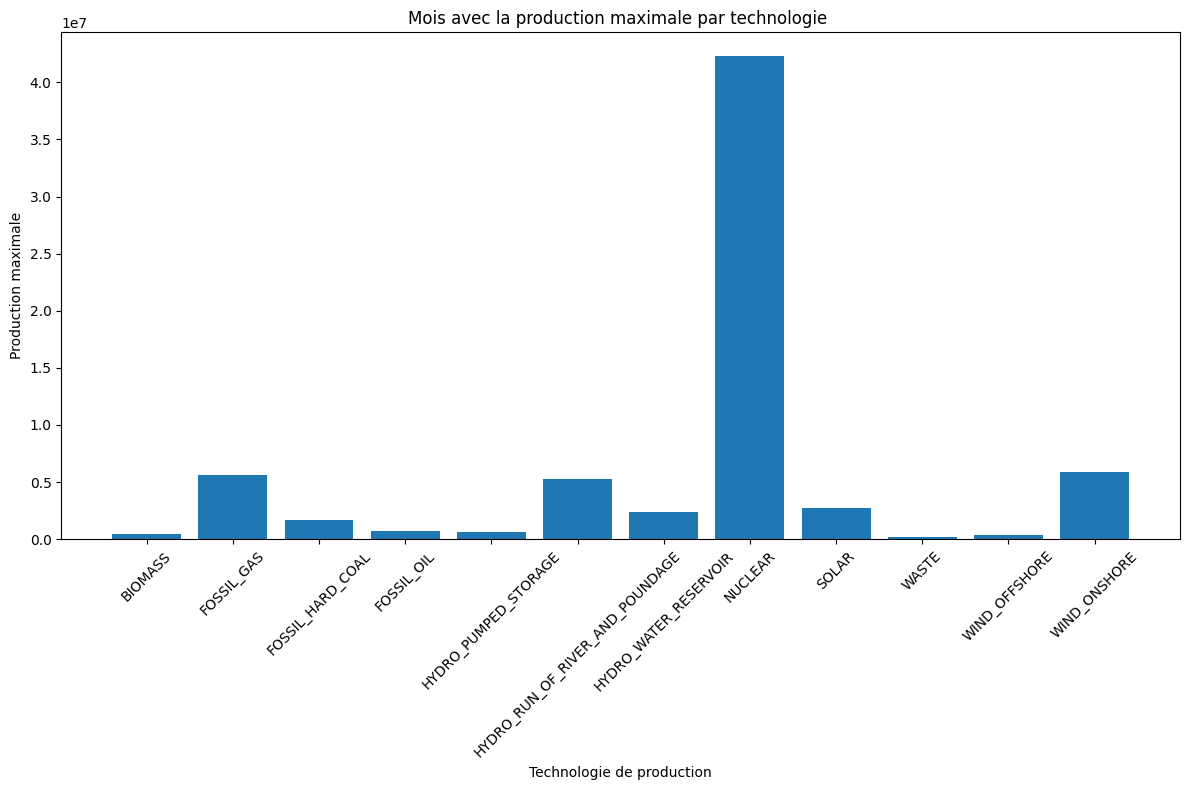

In [ ]:
# Exemple de diagramme à barres pour montrer le mois avec la production maximale pour chaque technologie
plt.figure(figsize=(12, 8))

plt.bar(filtered_max_production_by_technology['production_type'], filtered_max_production_by_technology['total_production'])
plt.title('Mois avec la production maximale par technologie ')
plt.xlabel('Technologie de production')
plt.ylabel('Production maximale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


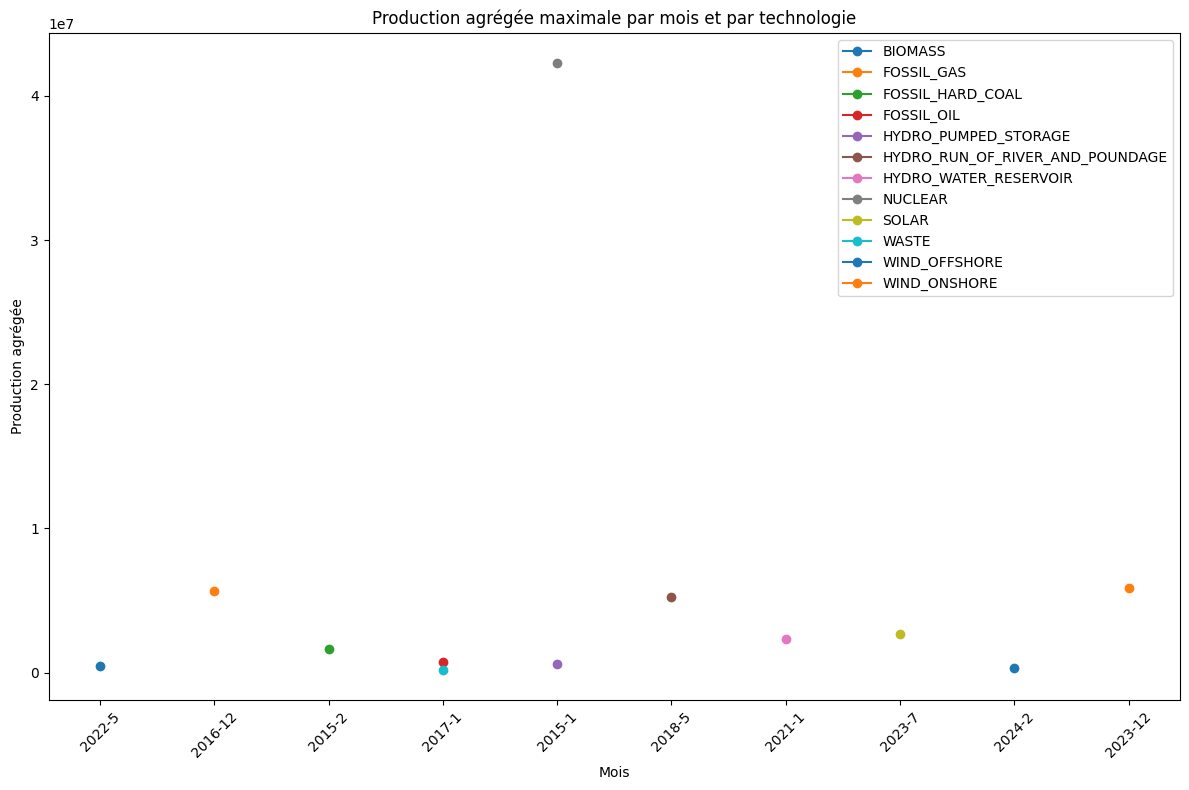

In [ ]:
import matplotlib.pyplot as plt

# Exemple de visualisation avec matplotlib
plt.figure(figsize=(12, 8))
for technology in filtered_max_production_by_technology['production_type'].unique():
    data = filtered_max_production_by_technology[filtered_max_production_by_technology['production_type'] == technology]
    plt.plot(data['year'].astype(str) + '-' + data['month'].astype(str), data['total_production'], marker='o', label=technology)

plt.xlabel('Mois')
plt.ylabel('Production agrégée')
plt.title('Production agrégée maximale par mois et par technologie')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ce graphe çi dessus montre bien chaque date ou le type de production atteint son maximum

In [ ]:
# Afficher le mois avec la production maximale pour chaque technologie
for technology in filtered_max_production_by_technology['production_type'].unique():
    data = filtered_max_production_by_technology[filtered_max_production_by_technology['production_type'] == technology]
    max_production_month = data.loc[data['total_production'].idxmax()]
    print(f"Technologie: {technology}")
    print(f"  Mois avec production maximale: {max_production_month['year']}-{max_production_month['month']:02d}")
    print(f"  Production maximale: {max_production_month['total_production']}\n")

Technologie: BIOMASS
  Mois avec production maximale: 2022-05
  Production maximale: 429073

Technologie: FOSSIL_GAS
  Mois avec production maximale: 2016-12
  Production maximale: 5645793

Technologie: FOSSIL_HARD_COAL
  Mois avec production maximale: 2015-02
  Production maximale: 1665463

Technologie: FOSSIL_OIL
  Mois avec production maximale: 2017-01
  Production maximale: 711160

Technologie: HYDRO_PUMPED_STORAGE
  Mois avec production maximale: 2015-01
  Production maximale: 605339

Technologie: HYDRO_RUN_OF_RIVER_AND_POUNDAGE
  Mois avec production maximale: 2018-05
  Production maximale: 5254132

Technologie: HYDRO_WATER_RESERVOIR
  Mois avec production maximale: 2021-01
  Production maximale: 2356269

Technologie: NUCLEAR
  Mois avec production maximale: 2015-01
  Production maximale: 42266494

Technologie: SOLAR
  Mois avec production maximale: 2023-07
  Production maximale: 2695192

Technologie: WASTE
  Mois avec production maximale: 2017-01
  Production maximale: 206235

T

## b. Données de consommation :

Les données de consommation d'énergie de RTE  utilisent les types suivants :

*   D-1 : Prévision de la consommation d'électricité pour le jour J-1 (veille du jour de livraison).
*   D-2 : Prévision de la consommation d'électricité pour le jour J-2 (avant-veille du jour de livraison).

*   ID : Prévision initiale de la consommation, calculée quelques jours avant le jour de livraison.
*   REALISED : Consommation d'électricité réellement observée (après le jour de livraison).








In [ ]:
import pandas as pd

# Supposons que le DataFrame df_consumption est déjà créé et contient les colonnes 'type', 'start_date', 'end_date', 'value'

# Convertir 'start_date' en datetime
df_consumption['start_date'] = pd.to_datetime(df_consumption['start_date'], utc=True)

# Extraire le mois et l'année de 'start_date'
df_consumption['month'] = df_consumption['start_date'].dt.month
df_consumption['year'] = df_consumption['start_date'].dt.year

# Calculer la consommation totale par mois et par type de consommation
monthly_consumption = df_consumption.groupby(['type', 'year', 'month'])['value'].sum().reset_index(name='total_consumption')

# Calculer la consommation totale pour chaque mois
total_consumption = monthly_consumption.groupby(['year', 'month'])['total_consumption'].sum().reset_index(name='total_consumption_all_types')

# Fusionner les deux DataFrames pour calculer le pourcentage
monthly_consumption = pd.merge(monthly_consumption, total_consumption, on=['year', 'month'])

# Calculer le pourcentage de chaque type de consommation dans la consommation totale
monthly_consumption['percentage'] = (monthly_consumption['total_consumption'] / monthly_consumption['total_consumption_all_types']) * 100

# Trouver le mois avec la consommation la plus élevée pour chaque type de consommation
max_consumption_by_type = monthly_consumption.loc[monthly_consumption.groupby('type')['total_consumption'].idxmax()]

# Afficher les résultats
print("Part de chaque type de consommation dans la consommation totale:")
print(monthly_consumption[['type', 'year', 'month', 'total_consumption', 'percentage']])

print("\nMois avec le plus haut niveau de consommation pour chaque type de consommation:")
print(max_consumption_by_type[['type', 'year', 'month', 'total_consumption']])



Part de chaque type de consommation dans la consommation totale:
         type  year  month  total_consumption  percentage
0         D-1  2012     12           80458050   28.620907
1         D-2  2012     12           39864000   14.180605
2          ID  2012     12           80423050   28.608456
3    REALISED  2012     12           80371255   28.590032
4         D-1  2013      1          205891550   28.602525
..        ...   ...    ...                ...         ...
547  REALISED  2024      4          130748062   27.787498
548       D-1  2024      5          122711929   28.510242
549       D-2  2024      5           61250661   14.230655
550        ID  2024      5          123218583   28.627955
551  REALISED  2024      5          123232321   28.631147

[552 rows x 5 columns]

Mois avec le plus haut niveau de consommation pour chaque type de consommation:
         type  year  month  total_consumption
196       D-1  2017      1          223372900
197       D-2  2017      1          112177

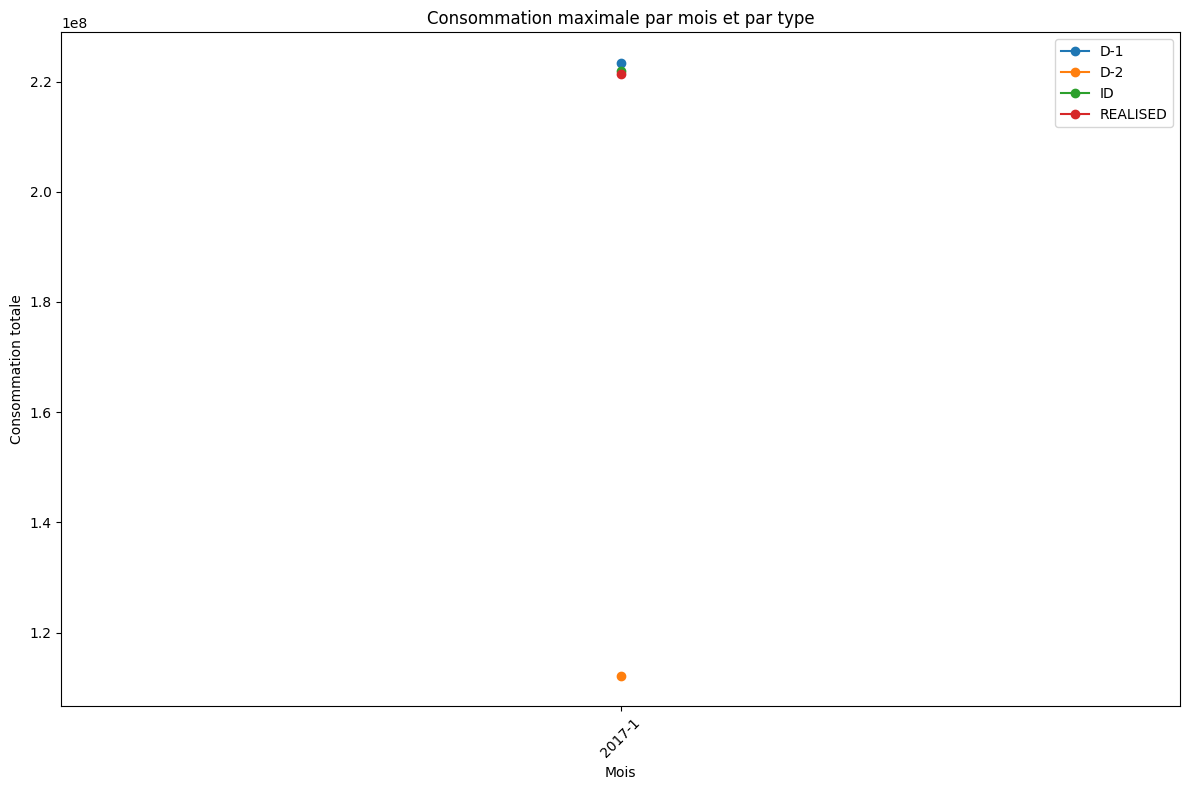

In [ ]:
import matplotlib.pyplot as plt

# Exemple de visualisation avec matplotlib pour les données de consommation
plt.figure(figsize=(12, 8))
for consumption_type in max_consumption_by_type['type'].unique():
    data = max_consumption_by_type[max_consumption_by_type['type'] == consumption_type]
    plt.plot(data['year'].astype(str) + '-' + data['month'].astype(str), data['total_consumption'], marker='o', label=consumption_type)

plt.xlabel('Mois')
plt.ylabel('Consommation totale')
plt.title('Consommation maximale par mois et par type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Modéle de prediction pour Prévoir la production totale d'énergie pour 06/2024  

Pour la prévision de la production totale d'énergie pour juin 2024, un modèle SARIMA (Seasonal AutoRegressive Integrated Moving Average) est privilégié par rapport à d'autre modele comme  une régression linéaire simple. SARIMA, une extension du modèle ARIMA (AutoRegressive Integrated Moving Average), est spécifiquement conçu pour prendre en compte à la fois les dépendances temporelles et la saisonnalité présentes dans les données de production d'énergie.

**Dépendances temporelles :** Tout comme ARIMA, SARIMA modélise la relation entre les observations actuelles et les observations passées, capturant ainsi les dépendances temporelles inhérentes aux séries temporelles.

**Saisonnalité :** SARIMA se distingue d'ARIMA par l'intégration de termes saisonniers supplémentaires. Ces termes permettent de modéliser les cycles périodiques présents dans les données de production d'énergie, tels que les variations saisonnières liées aux changements de température ou à la demande.

**Précision :** En intégrant à la fois les composantes ARIMA pour les dépendances temporelles et les composantes saisonnières pour les variations périodiques, SARIMA offre une meilleure précision que la régression linéaire et même que le modèle ARIMA seul. Cette précision accrue est essentielle pour une planification efficace et une gestion optimale des ressources énergétiques.

En conclusion, le modèle SARIMA est le choix optimal pour la prévision de la production totale d'énergie pour juin 2024, car il prend en compte de manière exhaustive les caractéristiques spécifiques de ces données, à savoir les dépendances temporelles et la saisonnalité. Cette approche garantit une prévision plus précise et fiable, indispensable pour la prise de décisions éclairées dans le secteur de l'énergie.



Production totale prévue pour juin 2024: 37951876.3088711


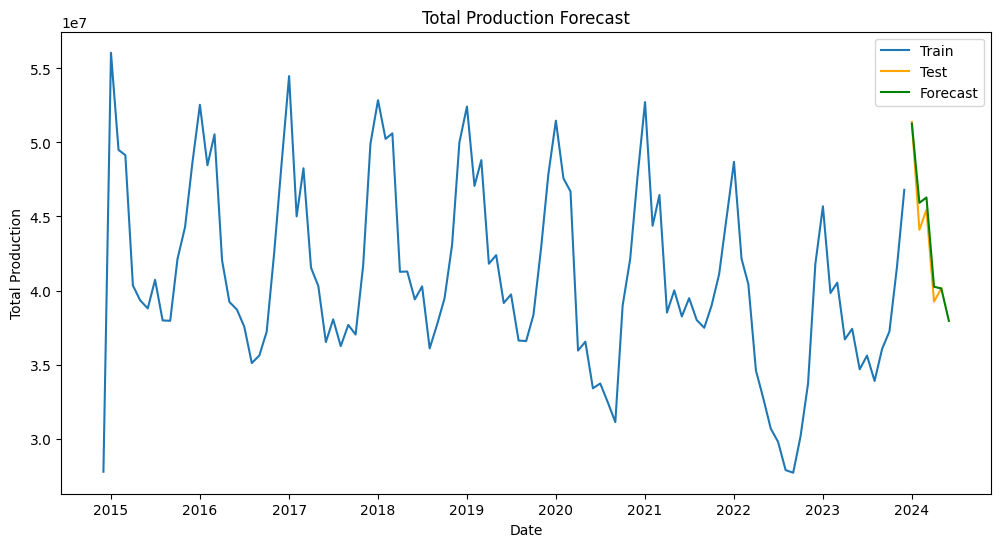

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Préparer les données
filtered_df = monthly_production[monthly_production['production_type'] != 'TOTAL']
monthly_total_production = filtered_df.groupby(['year', 'month'])['total_production'].sum().reset_index()
monthly_total_production['date'] = pd.to_datetime(monthly_total_production[['year', 'month']].assign(day=1))

# Indexer par la date
monthly_total_production.set_index('date', inplace=True)
monthly_total_production = monthly_total_production.asfreq('MS')

# Diviser les données en ensemble d'entraînement et de test
train = monthly_total_production[:'2023-12-01']
test = monthly_total_production['2024-01-01':]

# Ajuster le modèle ARIMA (p, d, q) avec (P, D, Q, s) pour SARIMA
model = SARIMAX(train['total_production'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Faire la prévision pour juin 2024
forecast = results.get_forecast(steps=6)
predicted_production_june_2024 = forecast.predicted_mean['2024-06-01']

# Afficher la prévision
print(f"Production totale prévue pour juin 2024: {predicted_production_june_2024}")

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_production'], label='Train')
plt.plot(test.index, test['total_production'], label='Test', color='orange')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Total Production')
plt.title('Total Production Forecast')
plt.legend()
plt.show()


Nous allons maintenant utiliser pmdarima, qui offre des fonctionnalités intégrées pour la recherche de paramètres optimaux afin d'avoir un modele avec la plus grande précision possible.

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3564.354, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3637.227, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3577.853, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3605.204, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3635.372, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3605.802, Time=0.29 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3578.417, Time=0.44 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=3566.216, Time=1.48 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3566.242, Time=1.77 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3641.042, Time=0.25 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3583.425, Time=0.86 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=3567.214, Time=0.50 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=3567.465, Time=1.41 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3563.297, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0

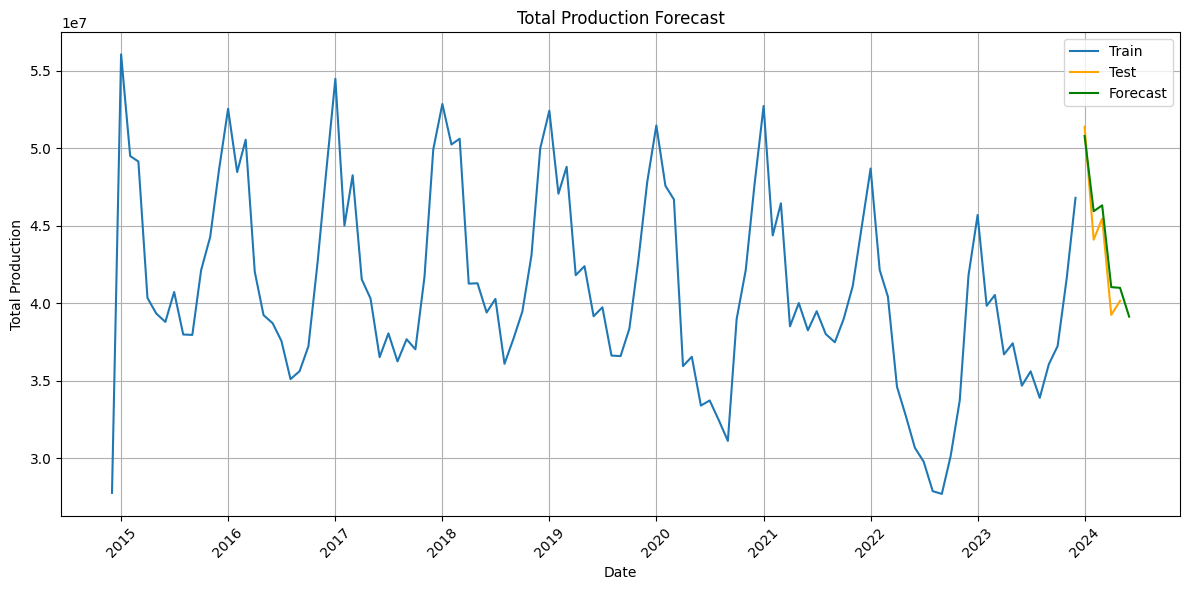

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Préparer les données
filtered_df = monthly_production[monthly_production['production_type'] != 'TOTAL']
monthly_total_production = filtered_df.groupby(['year', 'month'])['total_production'].sum().reset_index()
monthly_total_production['date'] = pd.to_datetime(monthly_total_production[['year', 'month']].assign(day=1))

# Indexer par la date
monthly_total_production.set_index('date', inplace=True)
monthly_total_production = monthly_total_production.asfreq('MS')

# Diviser les données en ensemble d'entraînement et de test
train = monthly_total_production[:'2023-12-01']
test = monthly_total_production['2024-01-01':]

# Utiliser auto_arima pour trouver les meilleurs paramètres
stepwise_model = auto_arima(train['total_production'], start_p=1, start_q=1,
                            max_p=3, max_q=3, seasonal=True,
                            start_P=1, start_Q=1, max_P=3, max_Q=3, m=12,
                            trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Résumé du modèle optimal
print(stepwise_model.summary())

# Ajuster le modèle SARIMA optimal
best_order = stepwise_model.order
best_seasonal_order = stepwise_model.seasonal_order

model = SARIMAX(train['total_production'], order=best_order, seasonal_order=best_seasonal_order)
results = model.fit()

# Faire la prévision pour juin 2024
forecast = results.get_forecast(steps=6)
predicted_production_june_2024 = forecast.predicted_mean['2024-06-01']

# Afficher la prévision
print(f"Production totale prévue pour juin 2024: {predicted_production_june_2024}")

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_production'], label='Train')
plt.plot(test.index, test['total_production'], label='Test', color='orange')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Total Production')
plt.title('Total Production Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Je vais maintenant evaluer à l'aide de la metrique MAPE la performance du modéle.la MAPE est souvent utilisée pour des séries temporelles car elle est intuitive et permet de comparer l'exactitude des prévisions sur différentes échelles de données. elle exprime aussi l'erreur en pourcentage, permettant une interprétation facile et une comparaison normalisée des performances du modèle.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prédire sur l'ensemble de test
test_forecast = results.get_forecast(steps=len(test))
predicted_test = test_forecast.predicted_mean


# Calculer les métriques d'évaluation
mae = mean_absolute_error(test['total_production'], predicted_test)
rmse = mean_squared_error(test['total_production'], predicted_test, squared=False)
mape = np.mean(np.abs((test['total_production'] - predicted_test) / test['total_production'])) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Percentage Error (MAPE): 2.771005606043745%



Dans l'ensemble, le modèle SARIMA semble bien fonctionner avec une MAPE de 2,77%. Une MAPE inférieure à 10% est généralement considérée comme une bonne performance pour un modèle de prévision.

Cette méthode assure que l'on utilise les meilleurs paramètres possibles pour le modèle SARIMA, augmentant ainsi la précision des prévisions.








**Conclusion:**

Le modèle SARIMA, en intégrant les composantes ARIMA et les termes saisonniers, se révèle être un outil puissant pour la prévision de séries temporelles présentant des tendances et des saisonnalités, telles que la production d'énergie. Cette approche rigoureuse, combinant une préparation minutieuse des données, un choix judicieux des paramètres et une évaluation visuelle des résultats, offre une meilleure précision par rapport à une régression linéaire simple, permettant ainsi une prise de décision éclairée dans le domaine de l'énergie.






